In [115]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import normaltest, shapiro, jarque_bera
from sklearn.preprocessing import PowerTransformer, QuantileTransformer, StandardScaler

In [116]:
df= pd.read_csv('train.csv')

In [117]:
df.sample(10)

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
15713,15713,10.0,Yes,0.0,1.0,Yes,NaN,0.0,Introvert
1484,1484,4.0,Yes,3.0,2.0,Yes,3.0,1.0,Introvert
7614,7614,0.0,No,10.0,4.0,No,15.0,8.0,Extrovert
12751,12751,1.0,No,6.0,4.0,No,8.0,NaN,Extrovert
869,869,10.0,Yes,2.0,0.0,Yes,NaN,2.0,Extrovert
3957,3957,4.0,No,9.0,6.0,No,10.0,8.0,Extrovert
7092,7092,NaN,No,4.0,6.0,No,7.0,4.0,Extrovert
6252,6252,0.0,No,4.0,5.0,No,NaN,5.0,Extrovert
17533,17533,11.0,Yes,3.0,1.0,NaN,4.0,1.0,Introvert
7156,7156,3.0,No,6.0,4.0,No,13.0,6.0,Extrovert


In [118]:
df.shape

(18524, 9)

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18524 entries, 0 to 18523
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         18524 non-null  int64  
 1   Time_spent_Alone           17334 non-null  float64
 2   Stage_fear                 16631 non-null  object 
 3   Social_event_attendance    17344 non-null  float64
 4   Going_outside              17058 non-null  float64
 5   Drained_after_socializing  17375 non-null  object 
 6   Friends_circle_size        17470 non-null  float64
 7   Post_frequency             17260 non-null  float64
 8   Personality                18524 non-null  object 
dtypes: float64(5), int64(1), object(3)
memory usage: 1.3+ MB


In [120]:
# Store original missing values count for comparison
original_missing = df.isna().sum()
print("Missing values before filling:")
print(original_missing[original_missing > 0])

Missing values before filling:
Time_spent_Alone             1190
Stage_fear                   1893
Social_event_attendance      1180
Going_outside                1466
Drained_after_socializing    1149
Friends_circle_size          1054
Post_frequency               1264
dtype: int64


In [121]:
df['Stage_fear'].value_counts()

Stage_fear
No     12609
Yes     4022
Name: count, dtype: int64

In [122]:
df['Drained_after_socializing'].value_counts()

Drained_after_socializing
No     13313
Yes     4062
Name: count, dtype: int64

In [123]:
df.describe()


,id,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,18524.000000,17334.000000,17344.000000,17058.000000,17470.000000,17260.000000
mean,9261.500000,3.137764,5.265106,4.044319,7.996737,4.982097
std,5347.562529,3.003786,2.753359,2.062580,4.223484,2.879139
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4630.750000,1.000000,3.000000,3.000000,5.000000,3.000000
50%,9261.500000,2.000000,5.000000,4.000000,8.000000,5.000000
75%,13892.250000,4.000000,8.000000,6.000000,12.000000,7.000000
max,18523.000000,11.000000,10.000000,7.000000,15.000000,10.000000


In [124]:
df['Time_spent_Alone'].fillna(df['Time_spent_Alone'].median(), inplace=True)
df['Going_outside'].fillna(df['Going_outside'].median(), inplace=True)
df['Post_frequency'].fillna(df['Post_frequency'].median(), inplace=True)
df['Social_event_attendance'].fillna(df['Social_event_attendance'].median(), inplace=True)
df['Friends_circle_size'].fillna(df['Friends_circle_size'].median(), inplace=True)


C:\Users\gaura\AppData\Local\Temp\ipykernel_28188\414141287.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Time_spent_Alone'].fillna(df['Time_spent_Alone'].median(), inplace=True)
C:\Users\gaura\AppData\Local\Temp\ipykernel_28188\414141287.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always b

In [125]:
df.isna().sum()

id                              0
Time_spent_Alone                0
Stage_fear                   1893
Social_event_attendance         0
Going_outside                   0
Drained_after_socializing    1149
Friends_circle_size             0
Post_frequency                  0
Personality                     0
dtype: int64

In [126]:
df['Stage_fear'].fillna(df['Stage_fear'].mode()[0], inplace=True)
df['Drained_after_socializing'].fillna(df['Drained_after_socializing'].mode()[0], inplace=True)


C:\Users\gaura\AppData\Local\Temp\ipykernel_28188\2972480575.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Stage_fear'].fillna(df['Stage_fear'].mode()[0], inplace=True)
C:\Users\gaura\AppData\Local\Temp\ipykernel_28188\2972480575.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18524 entries, 0 to 18523
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         18524 non-null  int64  
 1   Time_spent_Alone           18524 non-null  float64
 2   Stage_fear                 18524 non-null  object 
 3   Social_event_attendance    18524 non-null  float64
 4   Going_outside              18524 non-null  float64
 5   Drained_after_socializing  18524 non-null  object 
 6   Friends_circle_size        18524 non-null  float64
 7   Post_frequency             18524 non-null  float64
 8   Personality                18524 non-null  object 
dtypes: float64(5), int64(1), object(3)
memory usage: 1.3+ MB


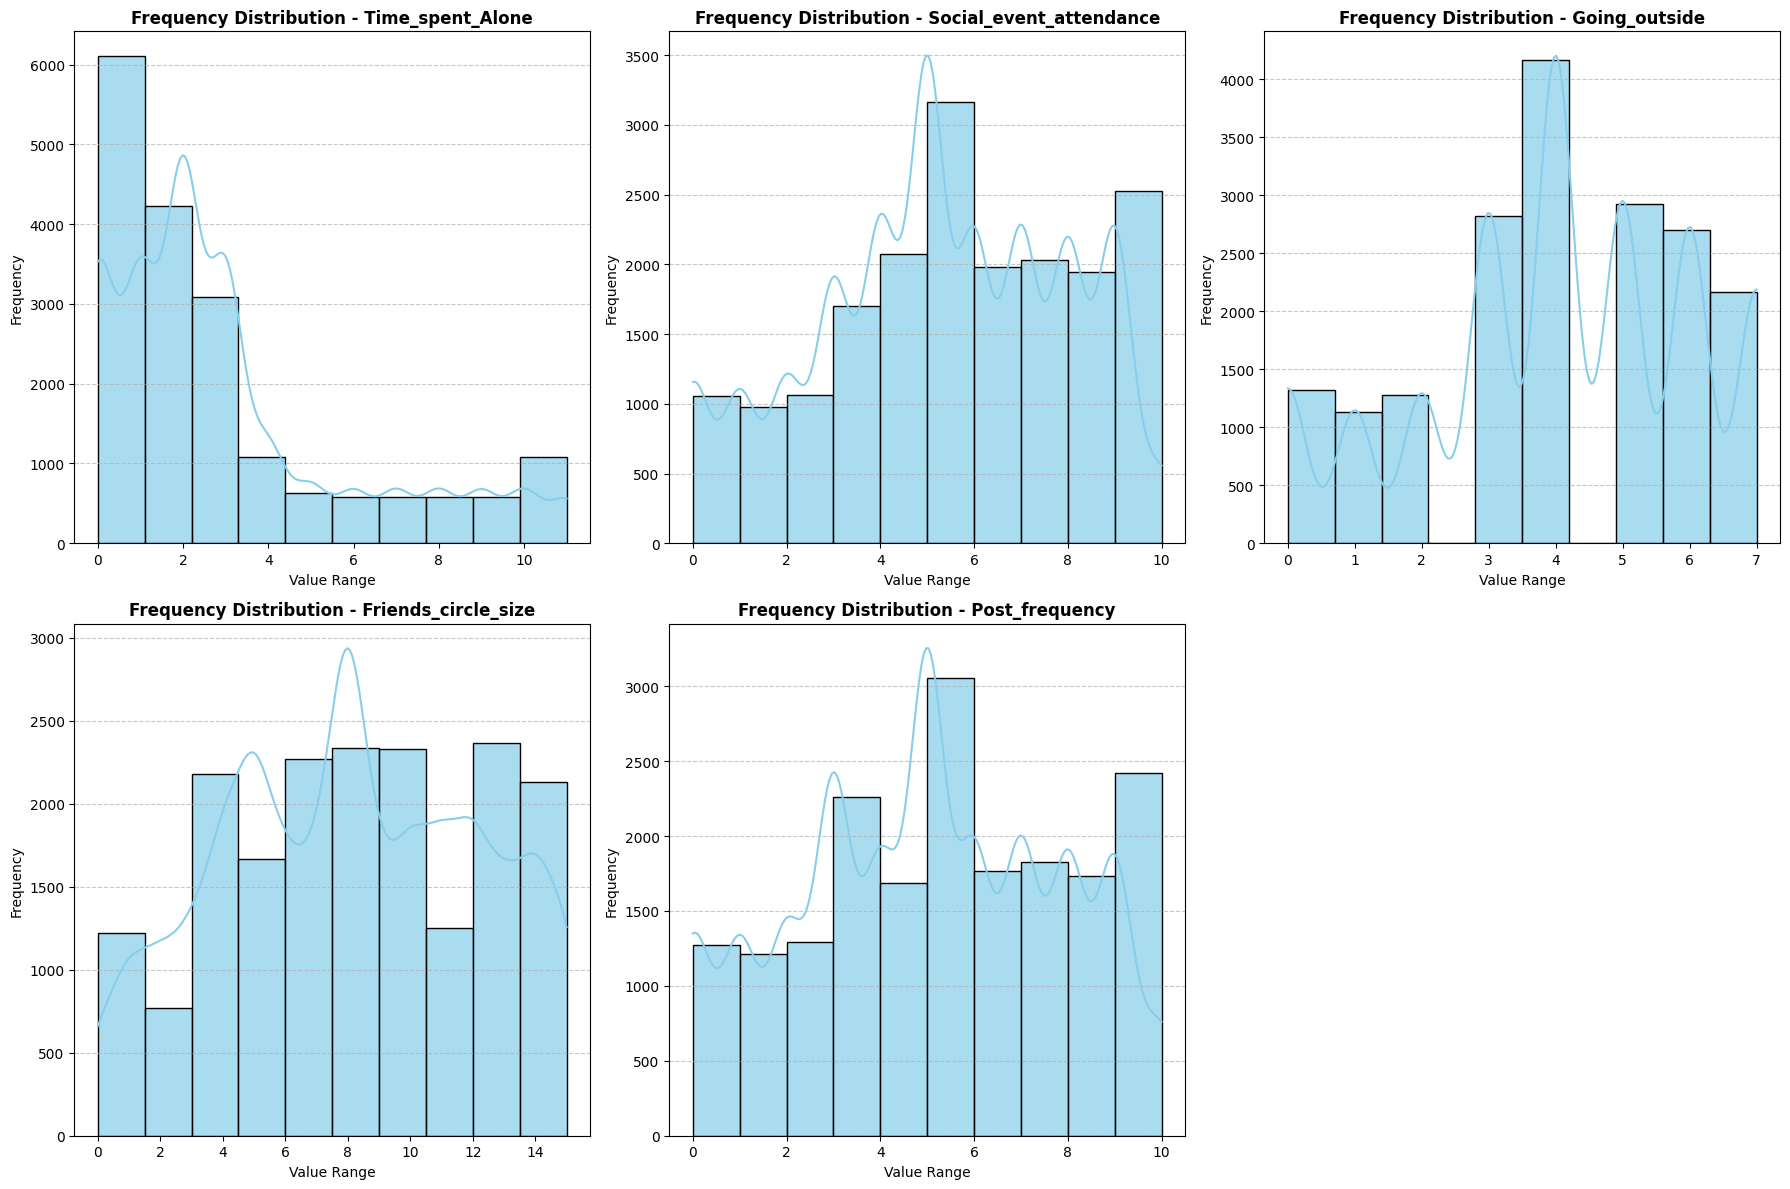

In [128]:
# Alternative using seaborn
columns_to_plot = ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 'Friends_circle_size', 'Post_frequency']

# Create a figure with subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

# Iterate through each column and create histograms using seaborn
for i, col in enumerate(columns_to_plot):
    # Create histogram with seaborn
    sns.histplot(data=df, x=col, bins=10, ax=axes[i], color='skyblue', alpha=0.7, kde=True)
    
    # Customize the plot
    axes[i].set_title(f'Frequency Distribution - {col}', fontsize=12, fontweight='bold')
    axes[i].set_xlabel('Value Range', fontsize=10)
    axes[i].set_ylabel('Frequency', fontsize=10)
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

# Hide the last subplot if not needed
axes[-1].set_visible(False)

plt.tight_layout()
plt.show()

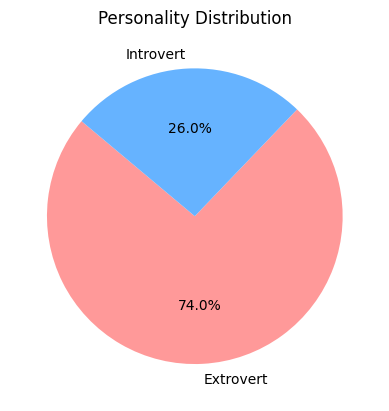

In [129]:
plt.pie(df['Personality'].value_counts(), labels=df['Personality'].unique(), autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
plt.title('Personality Distribution')
plt.show()

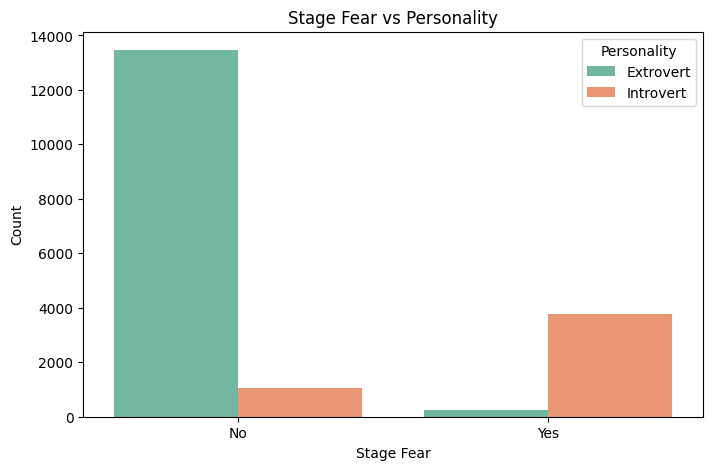

In [130]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Stage_fear', hue='Personality', palette='Set2')
plt.title('Stage Fear vs Personality')
plt.xlabel('Stage Fear')
plt.ylabel('Count')
plt.legend(title='Personality')
plt.show()

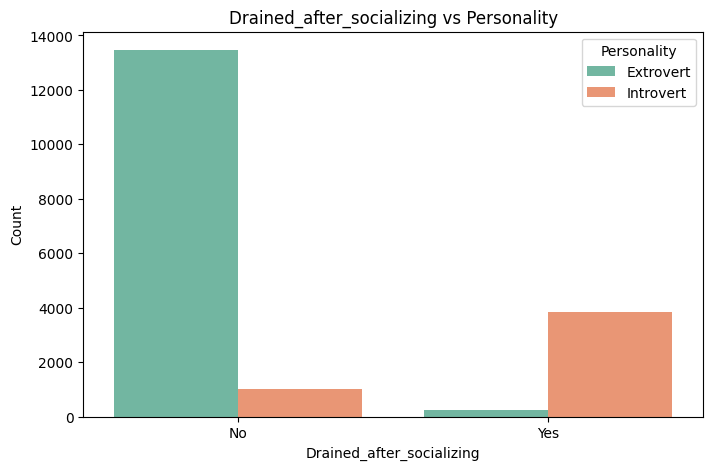

In [131]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Drained_after_socializing', hue='Personality', palette='Set2')
plt.title('Drained_after_socializing vs Personality')
plt.xlabel('Drained_after_socializing')
plt.ylabel('Count')
plt.legend(title='Personality')
plt.show()

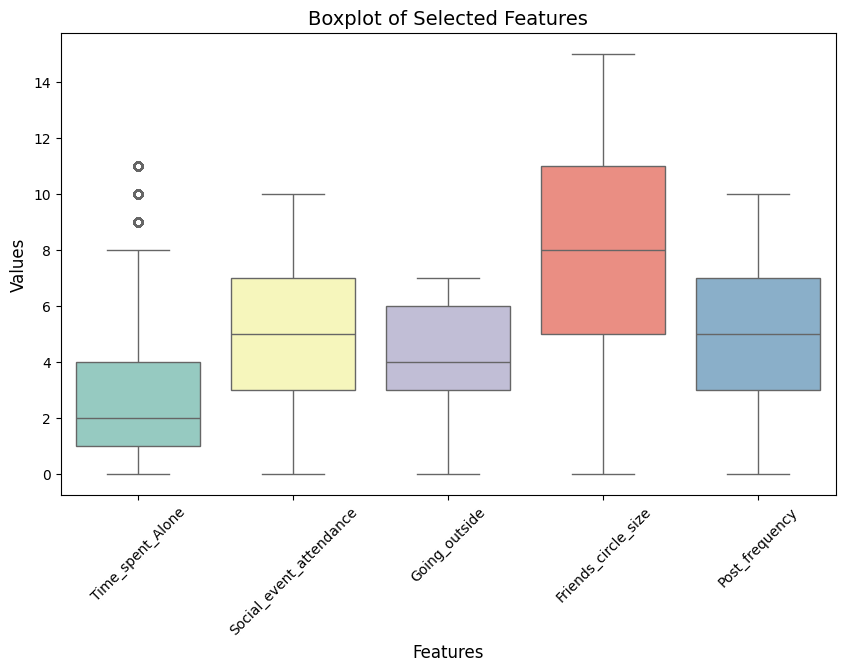

In [132]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[columns_to_plot], palette='Set3')
plt.title('Boxplot of Selected Features', fontsize=14)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.xticks(rotation=45)
plt.show()

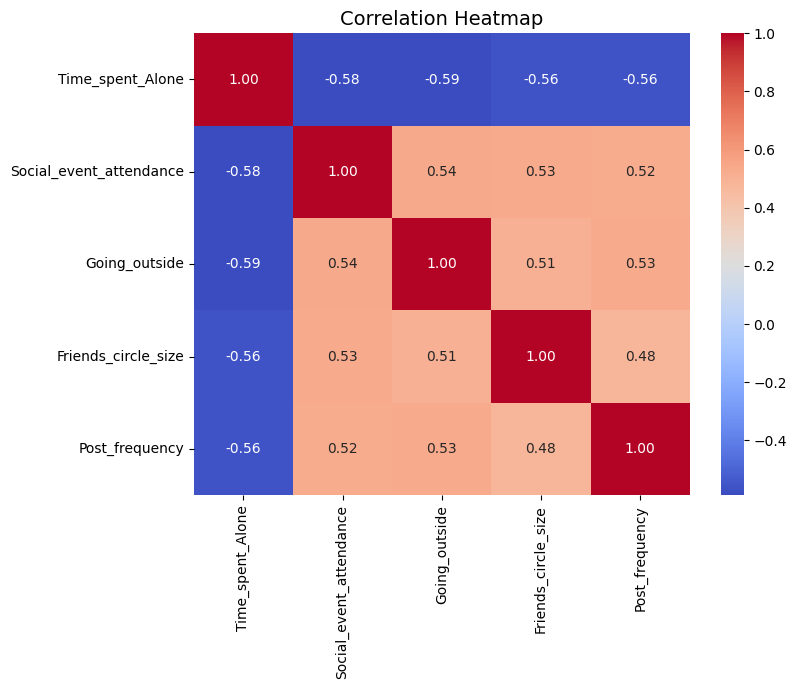

In [133]:
correlation_matrix = df[columns_to_plot].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap', fontsize=14)
plt.show()

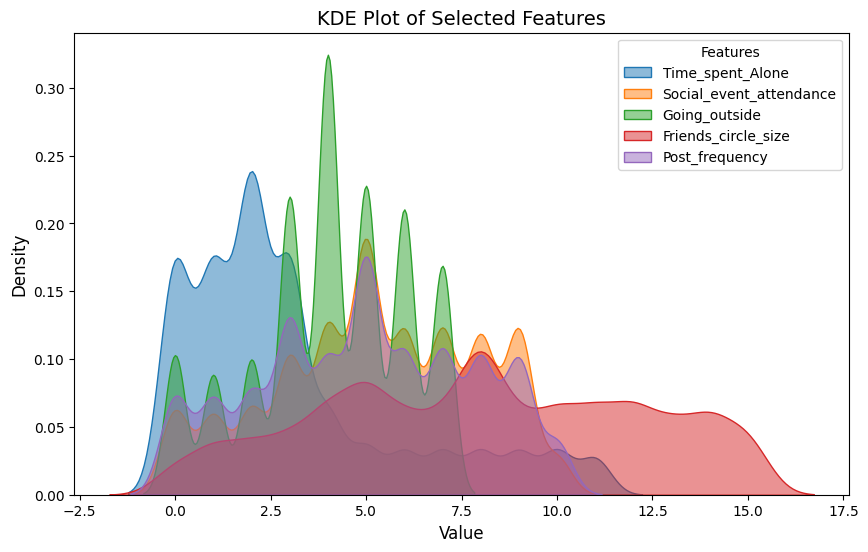

In [134]:
plt.figure(figsize=(10, 6))
for col in columns_to_plot:
        sns.kdeplot(data=df, x=col, fill=True, label=col, alpha=0.5)
plt.title('KDE Plot of Selected Features', fontsize=14)
plt.xlabel('Value', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(title='Features')
plt.show()

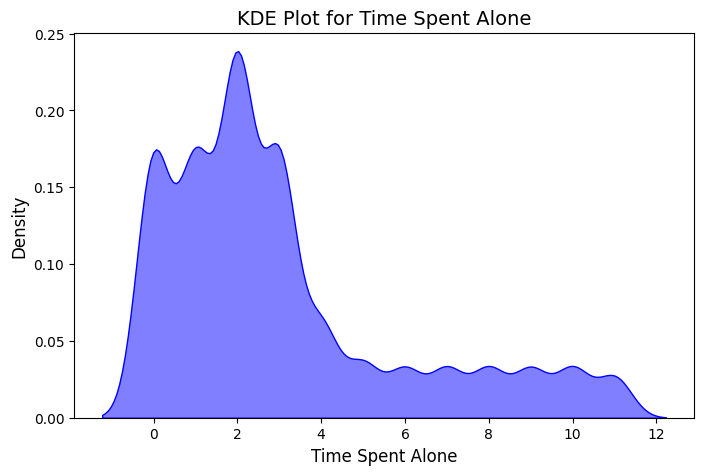

In [135]:
plt.figure(figsize=(8, 5))
sns.kdeplot(data=df, x='Time_spent_Alone', fill=True, color='blue', alpha=0.5)
plt.title('KDE Plot for Time Spent Alone', fontsize=14)
plt.xlabel('Time Spent Alone', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.show()

In [136]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer, QuantileTransformer, StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [137]:
categorical_features = ['Stage_fear', 'Drained_after_socializing']
numerical_features = ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 'Friends_circle_size', 'Post_frequency']


preprocessor = ColumnTransformer(
    transformers=[
        ('cat_cols', OneHotEncoder(drop='first'), categorical_features),
        ('num_cols', StandardScaler(), numerical_features)
    ]
)


In [138]:
y = df['Personality']
Labelencoder = LabelEncoder()
y_encoded = Labelencoder.fit_transform(y)

In [139]:
x = df[['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 'Friends_circle_size', 'Post_frequency','Stage_fear', 'Drained_after_socializing']]


x_train, x_test, y_train, y_test = train_test_split(x, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

In [140]:
preprocessor.fit(x_train, y_train)

,transformers,"[('cat_cols', ...), ('num_cols', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,categories,'auto'
,drop,'first'
,sparse_output,True
